In [ ]:
import os
import librosa
import librosa.display
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import shutil
import soundfile as sf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho para os dados no Google Drive
file_path_real = '/content/drive/MyDrive/audios_FOR/amostra_FOR/real'
file_path_fake = '/content/drive/MyDrive/audios_FOR/amostra_FOR/fake'

In [ ]:
# Listar os arquivos e subpastas
print(os.listdir(file_path_real))
print(os.listdir(file_path_fake))

['file1433.wav', 'file1366.wav', 'file1434.wav', 'file1379.wav', 'file1477.wav', 'file1358.wav', 'file14.wav', 'file1408.wav', 'file1475.wav', 'file1484.wav', 'file1353.wav', 'file1306.wav', 'file13.wav', 'file1335.wav', 'file1346.wav', 'file1296.wav', 'file1303.wav', 'file1348.wav', 'file1328.wav', 'file1322.wav', 'file8893.wav', 'file1286.wav', 'file1276.wav', 'file1245.wav', 'file1234.wav', 'file8648.wav', 'file1207.wav', 'file1205.wav', 'file1206.wav', 'file1228.wav', 'file1233.wav', 'file6024.wav', 'file1202.wav', 'file5987.wav', 'file1187.wav', 'file1175.wav', 'file120.wav', 'file1179.wav', 'file1188.wav', 'file5959.wav', 'file12.wav', 'file1176.wav', 'file119.wav', 'file118.wav', 'file5958.wav', 'file1170.wav', 'file10.wav', 'file1040.wav', 'file101.wav', 'file100.wav', 'file1025.wav', 'file1034.wav', 'file1.wav', 'file103.wav', 'file1035.wav', 'file106.wav', 'file1062.wav', 'file1080.wav', 'file105.wav', 'file245.wav', 'file107.wav', 'file1051.wav', 'file1079.wav', 'file104.wav

In [ ]:
# Função para processar os áudios em uma pasta
def process_audio_files(folder_path):

    for audio_file in os.listdir(folder_path):
        audio_path = os.path.join(folder_path, audio_file)

        # Carregar o áudio
        y, sr = librosa.load(audio_path, sr=None)

        # Mostrar informações do áudio
        print(f"Arquivo: {audio_file}, Duração: {len(y) / sr:.2f}s, Taxa de amostragem: {sr}Hz")

        # Plotar waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f"Waveform de {audio_file}")
        plt.xlabel("Tempo (s)")
        plt.ylabel("Amplitude")
        plt.show()

In [ ]:
# Processar áudios Real
#process_audio_files(file_path_real)

In [ ]:
# Processar áudios Fake
#process_audio_files(file_path_fake)

In [ ]:
# Função para extrair MFCCs de um arquivo
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)  # Média dos coeficientes

# Carregar dados e rótulos
data = []
labels = []

# Processar Fake
for file_name in os.listdir(file_path_fake):
    file_path = os.path.join(file_path_fake, file_name)
    features = extract_features(file_path)
    data.append(features)
    labels.append(0)  # Rótulo 0 para Fake

# Processar Real
for file_name in os.listdir(file_path_real):
    file_path = os.path.join(file_path_real, file_name)
    features = extract_features(file_path)
    data.append(features)
    labels.append(1)  # Rótulo 1 para Real

In [ ]:
# Converter para DataFrame
df = pd.DataFrame(data)
df['label'] = labels

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-288.915710,118.895401,-10.356814,7.442201,-16.135454,-0.141382,1.911304,-5.086845,-7.794334,-14.716392,6.331096,-13.362758,8.833967,0
1,-273.198639,105.193214,-10.644981,17.976397,0.469859,-1.831333,-14.594637,-9.847660,-4.482991,-13.791258,1.095741,-15.911661,3.619291,0
2,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
3,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
4,-257.937653,95.777596,-4.056822,15.742610,8.676238,-1.592806,-4.348527,-4.163268,-6.542841,-6.530914,-14.290150,-11.238543,-4.450969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,-205.848053,69.035927,6.154985,44.615654,-18.792049,-2.404219,-18.351648,-28.628574,-14.600924,-6.089769,-22.835791,2.003211,-11.248500,1
759,-243.188583,76.573982,3.576735,29.938738,-12.181126,-2.452531,-14.630096,1.670438,-3.601176,1.880779,-17.721584,5.673623,-12.476996,1
760,-347.042694,193.137390,-30.787479,9.523950,25.206856,13.511885,-9.119321,-3.360011,9.663671,-18.556343,-0.729798,10.197483,-2.653413,1
761,-241.250076,81.298477,6.276114,28.037865,-8.692244,-0.136342,-25.113270,1.726012,-10.625073,4.022922,-15.915772,5.705381,-7.945445,1


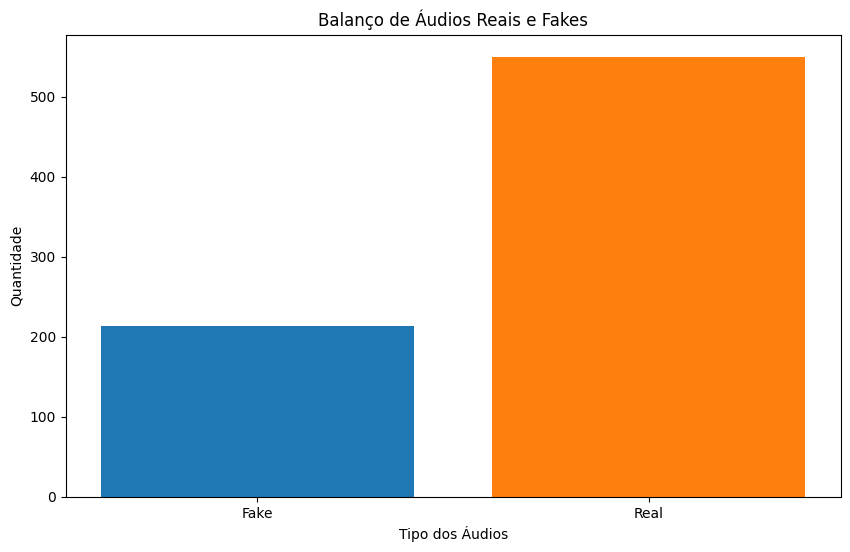

In [ ]:
# Contar as ocorrências de cada label
label_counts = [labels.count(0), labels.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [ ]:
# Separar características (X) e rótulos (y)
X = df.drop(columns=['label'])
y = df['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.99
Precisão: 1.00
Recall: 0.99
F1-Score: 1.00


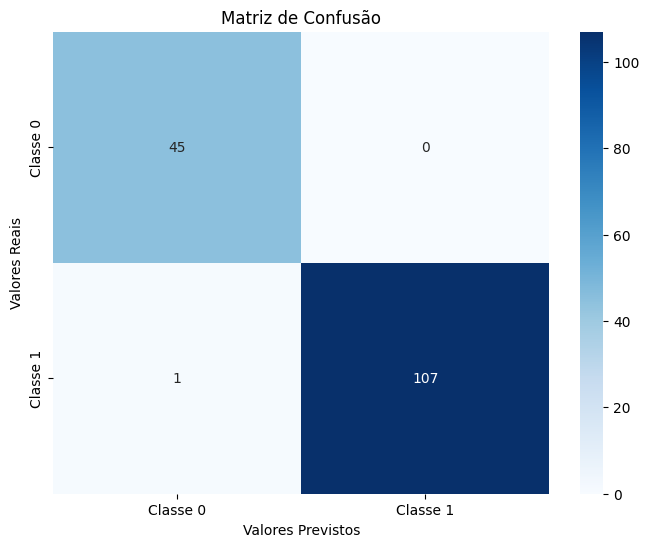

In [ ]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
def random_equalizer(y):
    """Função para aplicar equalização aleatória"""
    # Exemplo simples de equalização aleatória
    # Aqui você pode usar um equalizador real ou simular modificações nos dados do áudio
    gain = np.random.uniform(0.5, 2.0)  # Ganho aleatório entre 0.5 e 2.0
    return y * gain

In [ ]:
# Caminho para os dados no Google Drive
output_path = '/content/drive/MyDrive/audios_FOR/amostra_FOR_equalizado'

# Criação das pastas de destino se não existirem
os.makedirs(os.path.join(output_path, 'real'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'fake'), exist_ok=True)

# Listas para armazenar as características e rótulos com equalização aleatória
data_random_equalizer = []  # Dados com equalização aleatória
labels_random_equalizer = []  # Rótulos com equalização aleatória

# Processar Fake
for file_name in os.listdir(file_path_fake):
    file_path = os.path.join(file_path_fake, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_random_equalizer.append(features)
    labels_random_equalizer.append(0)  # Rótulo "fake"

    # Aplicar equalização aleatória
    y_eq = random_equalizer(y)  # Equalização aleatória
    features_eq = np.mean(librosa.feature.mfcc(y=y_eq, sr=sr, n_mfcc=13).T, axis=0)
    data_random_equalizer.append(features_eq)
    labels_random_equalizer.append(0)  # Rótulo "fake"

    # Salvar áudio original na pasta 'fake'
    output_file_path = os.path.join(output_path, 'fake', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com equalização aleatória na pasta 'fake' (com sufixo "_eq")
    output_file_path_eq = os.path.join(output_path, 'fake', file_name.replace('.wav', '_eq.wav'))
    sf.write(output_file_path_eq, y_eq, sr)  # Salvando a versão com equalização aleatória

# Processar Real
for file_name in os.listdir(file_path_real):
    file_path = os.path.join(file_path_real, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_random_equalizer.append(features)
    labels_random_equalizer.append(1)  # Rótulo "real"

    # Aplicar equalização aleatória
    y_eq = random_equalizer(y)  # Equalização aleatória
    features_eq = np.mean(librosa.feature.mfcc(y=y_eq, sr=sr, n_mfcc=13).T, axis=0)
    data_random_equalizer.append(features_eq)
    labels_random_equalizer.append(1)  # Rótulo "real"

    # Salvar áudio original na pasta 'real'
    output_file_path = os.path.join(output_path, 'real', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com equalização aleatória na pasta 'real' (com sufixo "_eq")
    output_file_path_eq = os.path.join(output_path, 'real', file_name.replace('.wav', '_eq.wav'))
    sf.write(output_file_path_eq, y_eq, sr)  # Salvando a versão com equalização aleatória

In [ ]:
# Converter para DataFrame
df_random_equalizer = pd.DataFrame(data_random_equalizer)
df_random_equalizer['label'] = labels_random_equalizer

In [ ]:
df_random_equalizer

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-288.915710,118.895401,-10.356814,7.442201,-16.135454,-0.141382,1.911304,-5.086845,-7.794334,-14.716392,6.331096,-13.362758,8.833967,0
1,-328.881897,118.895401,-10.356813,7.442200,-16.135454,-0.141382,1.911305,-5.086845,-7.794335,-14.716392,6.331095,-13.362757,8.833967,0
2,-273.198639,105.193214,-10.644981,17.976397,0.469859,-1.831333,-14.594637,-9.847660,-4.482991,-13.791258,1.095741,-15.911661,3.619291,0
3,-264.911530,105.193214,-10.644980,17.976397,0.469859,-1.831333,-14.594637,-9.847660,-4.482992,-13.791258,1.095741,-15.911659,3.619292,0
4,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,-347.175446,193.137375,-30.787476,9.523949,25.206856,13.511885,-9.119321,-3.360011,9.663671,-18.556343,-0.729798,10.197483,-2.653413,1
1522,-241.250076,81.298477,6.276114,28.037865,-8.692244,-0.136342,-25.113270,1.726012,-10.625073,4.022922,-15.915772,5.705381,-7.945445,1
1523,-225.313629,81.298477,6.276114,28.037867,-8.692243,-0.136342,-25.113268,1.726013,-10.625072,4.022922,-15.915772,5.705381,-7.945443,1
1524,-308.821716,57.043686,3.870187,30.615040,-13.108034,-13.102796,-21.079472,-21.996910,-15.296227,-3.665011,-15.141479,1.185465,-17.169489,1


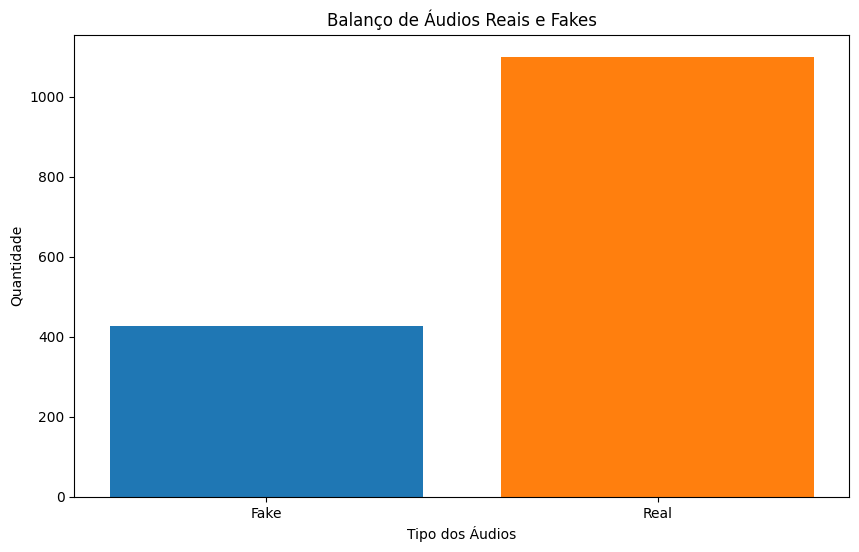

In [ ]:
# Contar as ocorrências de cada label
label_counts = [labels_random_equalizer.count(0), labels_random_equalizer.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [ ]:
# Separar características (X) e rótulos (y)
X = df_random_equalizer.drop(columns=['label'])
y = df_random_equalizer['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 1.00
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00


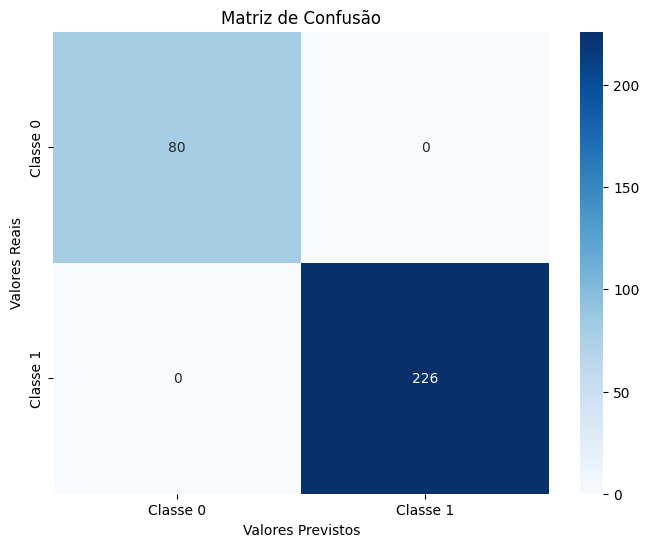

In [ ]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
output_path = '/content/drive/MyDrive/audios_FOR/amostra_FOR_equalizado_balanced'

# Criação das pastas de destino se não existirem
os.makedirs(os.path.join(output_path, 'real'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'fake'), exist_ok=True)

# Listas para armazenar as características e rótulos com equalização aleatória balanceada
data_random_equalizer_balanced = []  # Dados com equalização aleatória balanceada
labels_random_equalizer_balanced = []  # Rótulos com equalização aleatória balanceada

# Função para balancear os dados usando replicação simples
def balance_data(real_files, fake_files):
    """Balanceia os dados replicando aleatoriamente as amostras da classe minoritária."""
    len_real = len(real_files)
    len_fake = len(fake_files)

    # Verificar qual classe tem menos amostras
    if len_real > len_fake:
        # Replicar os arquivos 'fake' até igualar o número
        fake_files += random.choices(fake_files, k=len_real - len_fake)
    elif len_fake > len_real:
        # Replicar os arquivos 'real' até igualar o número
        real_files += random.choices(real_files, k=len_fake - len_real)

    return real_files, fake_files

# Função para aplicar equalização aleatória no áudio
def random_equalizer(y):
    """Aplica equalização aleatória no áudio."""
    # Exemplo de equalização aleatória (ajuste conforme necessário)
    random_factor = random.uniform(0.5, 1.5)
    return y * random_factor

# Obter listas de arquivos reais e fakes
real_files = os.listdir(file_path_real)
fake_files = os.listdir(file_path_fake)

# Balancear os arquivos
real_files, fake_files = balance_data(real_files, fake_files)

# Processar Fake
for file_name in fake_files:
    file_path = os.path.join(file_path_fake, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_random_equalizer_balanced.append(features)
    labels_random_equalizer_balanced.append(0)  # Rótulo "fake"

    # Aplicar equalização aleatória
    y_eq = random_equalizer(y)  # Equalização aleatória
    features_eq = np.mean(librosa.feature.mfcc(y=y_eq, sr=sr, n_mfcc=13).T, axis=0)
    data_random_equalizer_balanced.append(features_eq)
    labels_random_equalizer_balanced.append(0)  # Rótulo "fake"

    # Salvar áudio original na pasta 'fake'
    output_file_path = os.path.join(output_path, 'fake', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com equalização aleatória na pasta 'fake' (com sufixo "_eq")
    output_file_path_eq = os.path.join(output_path, 'fake', file_name.replace('.wav', '_eq.wav'))
    sf.write(output_file_path_eq, y_eq, sr)  # Salvando a versão com equalização aleatória

# Processar Real
for file_name in real_files:
    file_path = os.path.join(file_path_real, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_random_equalizer_balanced.append(features)
    labels_random_equalizer_balanced.append(1)  # Rótulo "real"

    # Aplicar equalização aleatória
    y_eq = random_equalizer(y)  # Equalização aleatória
    features_eq = np.mean(librosa.feature.mfcc(y=y_eq, sr=sr, n_mfcc=13).T, axis=0)
    data_random_equalizer_balanced.append(features_eq)
    labels_random_equalizer_balanced.append(1)  # Rótulo "real"

    # Salvar áudio original na pasta 'real'
    output_file_path = os.path.join(output_path, 'real', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com equalização aleatória na pasta 'real' (com sufixo "_eq")
    output_file_path_eq = os.path.join(output_path, 'real', file_name.replace('.wav', '_eq.wav'))
    sf.write(output_file_path_eq, y_eq, sr)  # Salvando a versão com equalização aleatória

In [ ]:
# Converter para DataFrame
df_random_equalizer_balanced = pd.DataFrame(data_random_equalizer)
df_random_equalizer_balanced['label'] = labels_random_equalizer

In [ ]:
df_random_equalizer_balanced

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-288.915710,118.895401,-10.356814,7.442201,-16.135454,-0.141382,1.911304,-5.086845,-7.794334,-14.716392,6.331096,-13.362758,8.833967,0
1,-328.881897,118.895401,-10.356813,7.442200,-16.135454,-0.141382,1.911305,-5.086845,-7.794335,-14.716392,6.331095,-13.362757,8.833967,0
2,-273.198639,105.193214,-10.644981,17.976397,0.469859,-1.831333,-14.594637,-9.847660,-4.482991,-13.791258,1.095741,-15.911661,3.619291,0
3,-264.911530,105.193214,-10.644980,17.976397,0.469859,-1.831333,-14.594637,-9.847660,-4.482992,-13.791258,1.095741,-15.911659,3.619292,0
4,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,-347.175446,193.137375,-30.787476,9.523949,25.206856,13.511885,-9.119321,-3.360011,9.663671,-18.556343,-0.729798,10.197483,-2.653413,1
1522,-241.250076,81.298477,6.276114,28.037865,-8.692244,-0.136342,-25.113270,1.726012,-10.625073,4.022922,-15.915772,5.705381,-7.945445,1
1523,-225.313629,81.298477,6.276114,28.037867,-8.692243,-0.136342,-25.113268,1.726013,-10.625072,4.022922,-15.915772,5.705381,-7.945443,1
1524,-308.821716,57.043686,3.870187,30.615040,-13.108034,-13.102796,-21.079472,-21.996910,-15.296227,-3.665011,-15.141479,1.185465,-17.169489,1


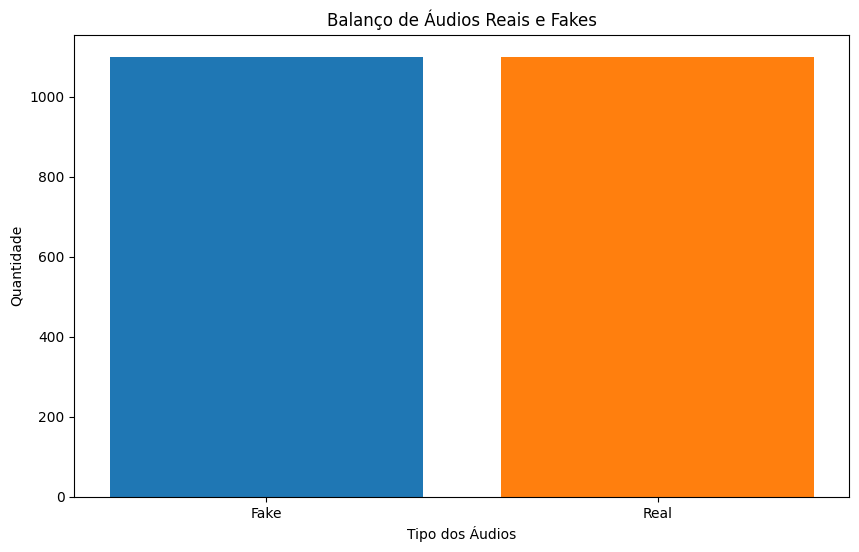

In [ ]:
# Contar as ocorrências de cada label
label_counts = [labels_random_equalizer_balanced.count(0), labels_random_equalizer_balanced.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [ ]:
# Separar características (X) e rótulos (y)
X = df_random_equalizer_balanced.drop(columns=['label'])
y = df_random_equalizer_balanced['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 1.00
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00


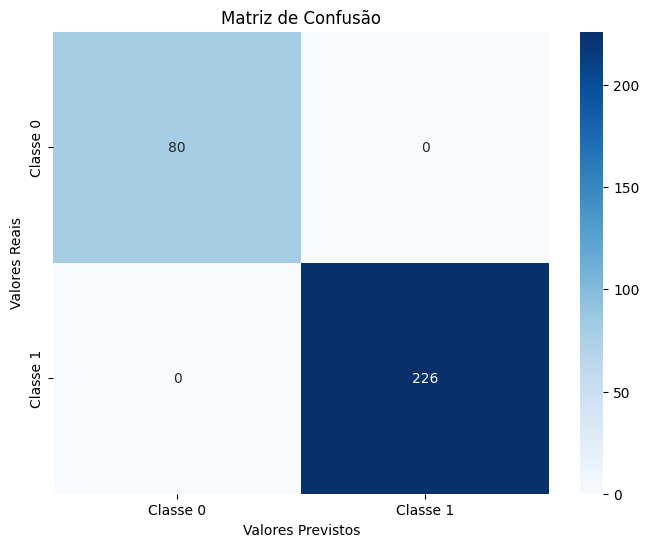

In [ ]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()